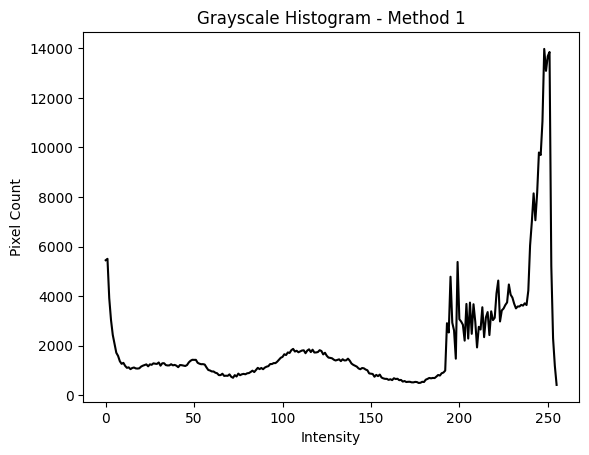

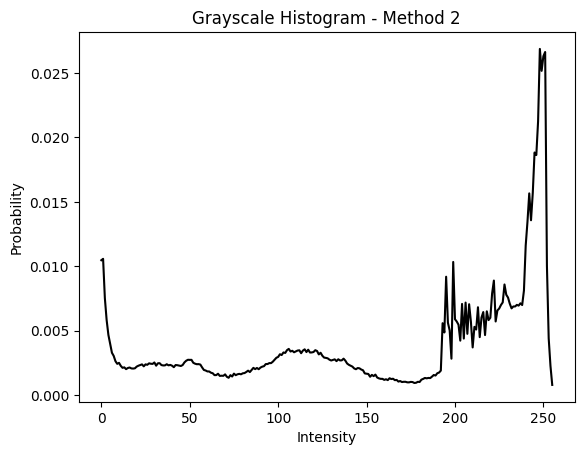

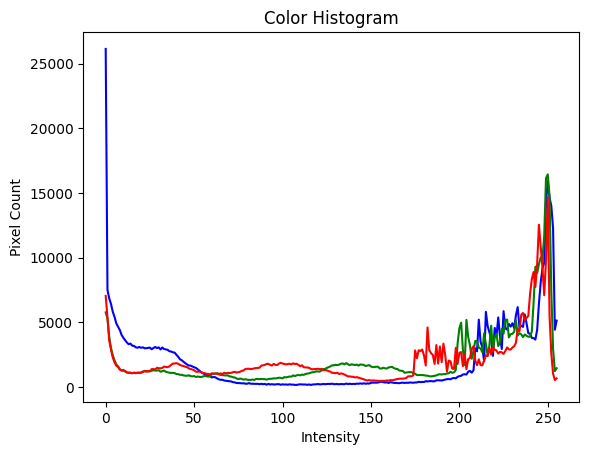

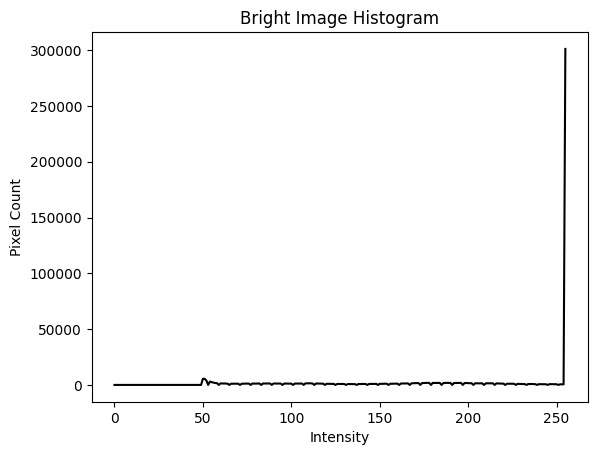

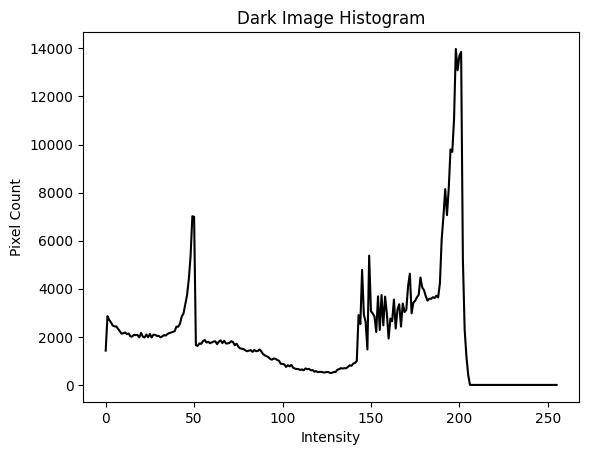

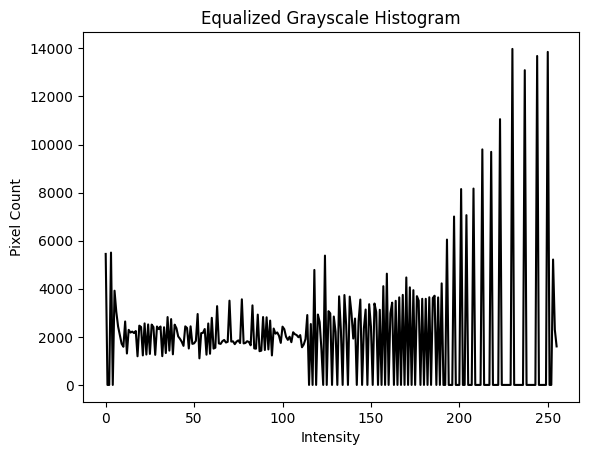

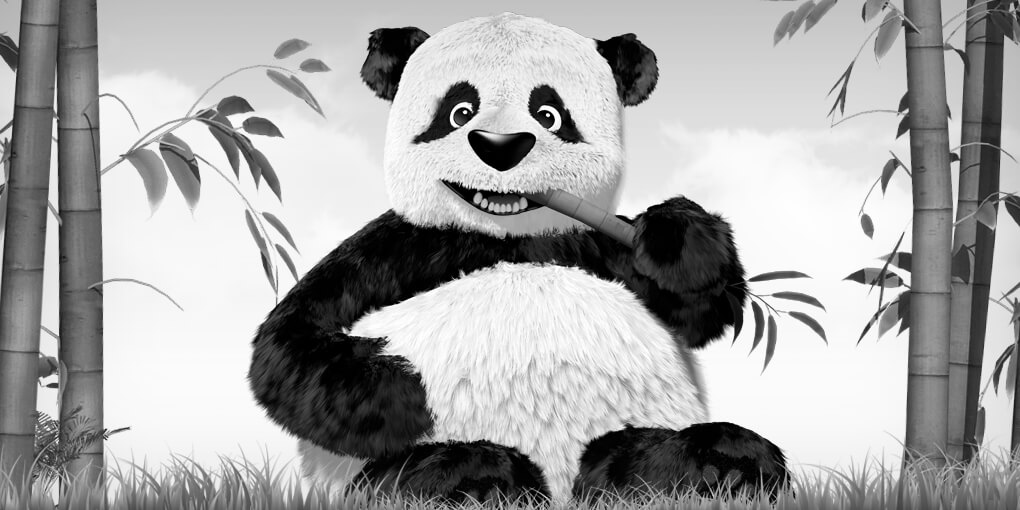

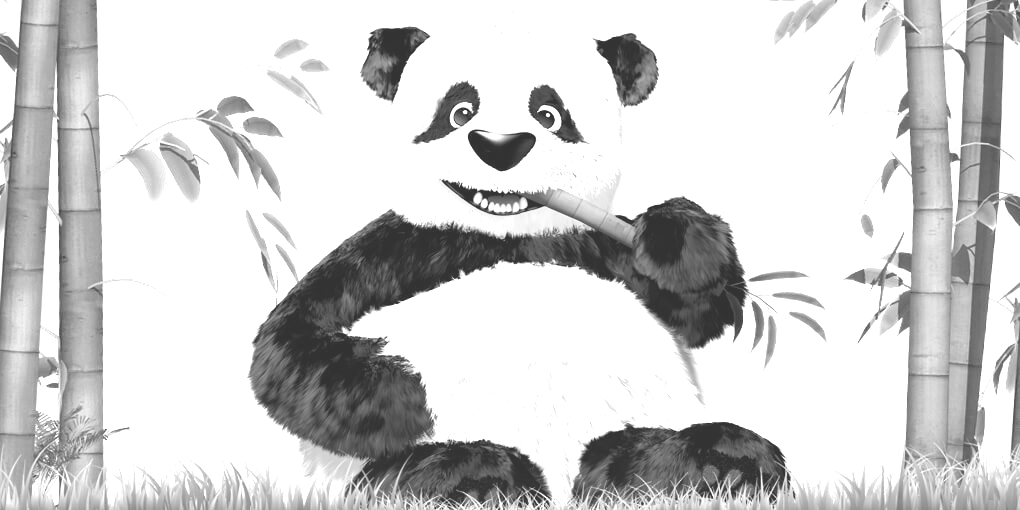

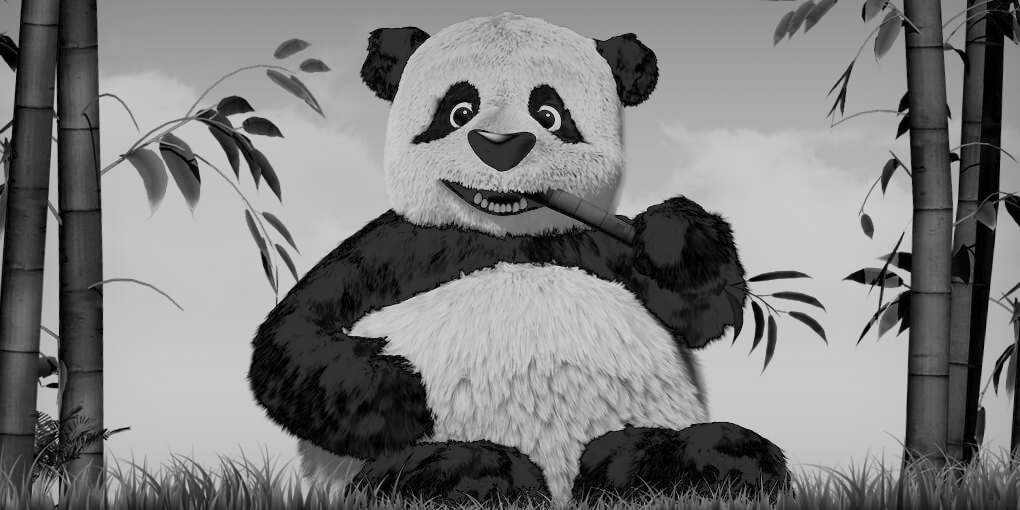

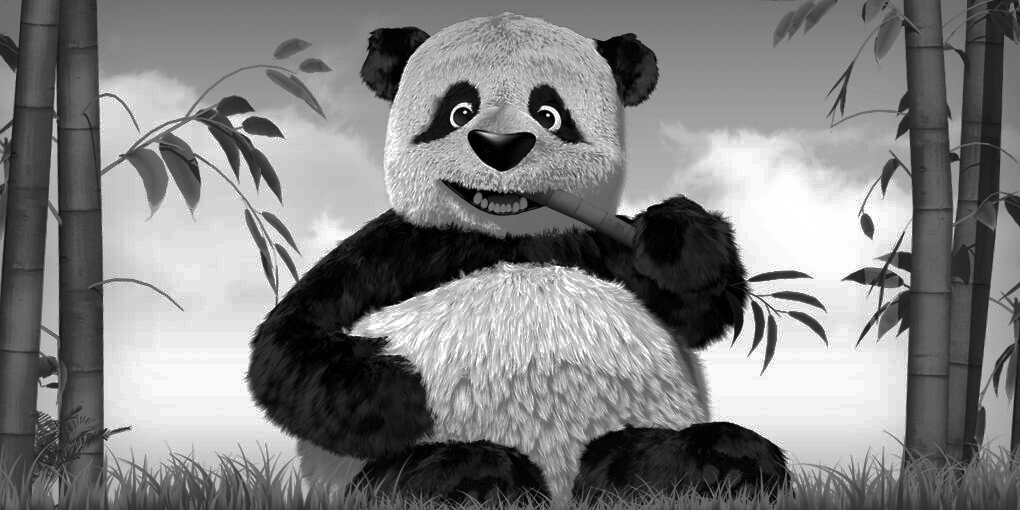

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the color image
image = cv2.imread("image.jpg")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to compute and plot histograms
def plot_histogram(image, title, method=1):
    if len(image.shape) == 2:  # Grayscale Image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    else:  # Color Image
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title(title)
        plt.xlabel("Intensity")
        plt.ylabel("Pixel Count" if method == 1 else "Probability")
        plt.show()
        return

    if method == 2:
        hist = hist / hist.sum()  # Normalize for probability

    plt.plot(hist, color='black')
    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Pixel Count" if method == 1 else "Probability")
    plt.show()

# Display histograms for grayscale and color images
plot_histogram(gray, "Grayscale Histogram - Method 1", method=1)
plot_histogram(gray, "Grayscale Histogram - Method 2", method=2)
plot_histogram(image, "Color Histogram", method=1)

# Modify image brightness
bright_image = cv2.convertScaleAbs(gray, alpha=1.2, beta=50)  # Increase brightness
dark_image = cv2.convertScaleAbs(gray, alpha=1.0, beta=-50)  # Decrease brightness

# Display histograms for bright and dark images
plot_histogram(bright_image, "Bright Image Histogram", method=1)
plot_histogram(dark_image, "Dark Image Histogram", method=1)

# Histogram Equalization
equalized_gray = cv2.equalizeHist(gray)
plot_histogram(equalized_gray, "Equalized Grayscale Histogram", method=1)

# Show images for comparison
cv2_imshow(gray)               # Original Grayscale
cv2_imshow(bright_image)       # Bright Image
cv2_imshow(dark_image)         # Dark Image
cv2_imshow(equalized_gray)     # Equalized Grayscale


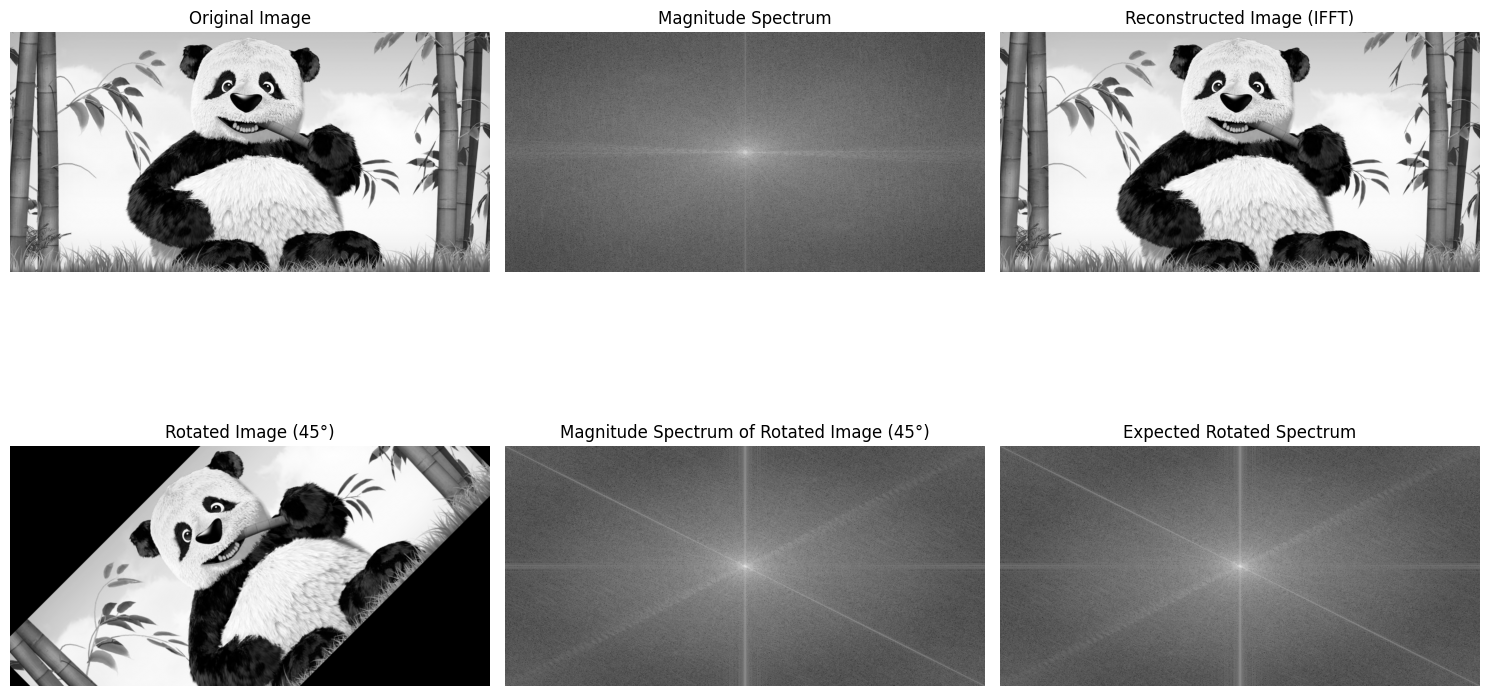

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute FFT and Magnitude Spectrum
dft = np.fft.fft2(image)  # Compute FFT
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency component to center
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)  # Compute magnitude spectrum

# Step 2: Compute Inverse FFT (IFFT)
dft_inverse_shift = np.fft.ifftshift(dft_shift)  # Shift back
reconstructed_image = np.fft.ifft2(dft_inverse_shift).real  # Compute IFFT

# Step 3: Rotation Property Verification
angle = 45  # Rotate by 45 degrees
(h, w) = image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Compute FFT of rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift) + 1)

# Display Images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

# Magnitude Spectrum
axs[0, 1].imshow(magnitude_spectrum, cmap='gray')
axs[0, 1].set_title("Magnitude Spectrum")
axs[0, 1].axis('off')

# Reconstructed Image
axs[0, 2].imshow(reconstructed_image, cmap='gray')
axs[0, 2].set_title("Reconstructed Image (IFFT)")
axs[0, 2].axis('off')

# Rotated Image
axs[1, 0].imshow(rotated_image, cmap='gray')
axs[1, 0].set_title(f"Rotated Image ({angle}°)")
axs[1, 0].axis('off')

# Magnitude Spectrum of Rotated Image
axs[1, 1].imshow(magnitude_spectrum_rotated, cmap='gray')
axs[1, 1].set_title(f"Magnitude Spectrum of Rotated Image ({angle}°)")
axs[1, 1].axis('off')

# Verify Spectrum Rotation
axs[1, 2].imshow(magnitude_spectrum_rotated, cmap='gray')
axs[1, 2].set_title("Expected Rotated Spectrum")
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
